In [259]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from math import sqrt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.np.random.seed(5)

In [260]:
df1 = pd.read_csv('https://raw.githubusercontent.com/lucheol/in243/master/projeto/cluster_dataset_1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/lucheol/in243/master/projeto/cluster_dataset_2.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/lucheol/in243/master/projeto/cluster_dataset_3.csv')

In [261]:
#Manipulação

df1.drop(['Unnamed: 0'], axis=1, inplace=True)
df2.drop(['Unnamed: 0'], axis=1, inplace=True)
df3.drop(['Unnamed: 0'], axis=1, inplace=True)

In [262]:
#Estratificaçâo

scaler = StandardScaler()
scaled_df1 = scaler.fit_transform(df1)
scaled_df2 = scaler.fit_transform(df2)
scaled_df3 = scaler.fit_transform(df3)

In [263]:
#Função_Erro_Quadrático

def get_kmeans(num_clusters, df):
    model = KMeans(n_clusters=num_clusters)
    model.fit(df)
    return [num_clusters, model.inertia_]

In [264]:
#Função_WCSS

def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

In [265]:
#Função_Optimal_Number

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

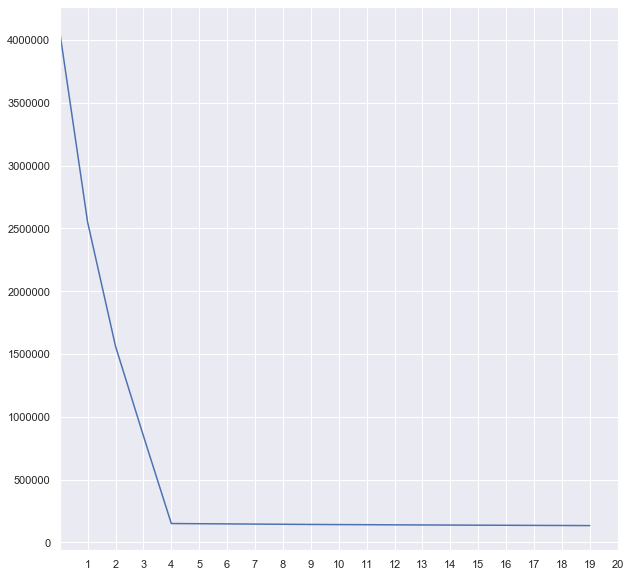

In [266]:
#Cluster_Dataset_1

resultado_df1 = [get_kmeans(num_grupos, df1) for num_grupos in range(1,21)]
resultado_df1 = pd.DataFrame(resultado_df1, columns=['groups', 'inertia'])
resultado_df1['inertia'].plot(xticks=resultado_df1['groups'])

In [267]:
print(f"optimal_number_of_clusters_df1: {optimal_number_of_clusters(calculate_wcss(scaled_df1))}")

optimal_number_of_clusters_df1: 5


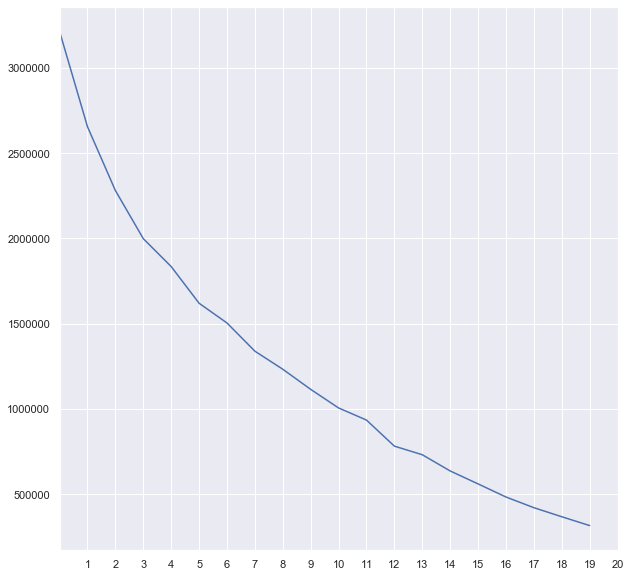

In [268]:
#Cluster_Dataset_2

resultado_df2 = [get_kmeans(num_grupos, df2) for num_grupos in range(1,21)]
resultado_df2 = pd.DataFrame(resultado_df2, columns=['groups', 'inertia'])
resultado_df2['inertia'].plot(xticks=resultado_df2['groups'])

In [269]:
print(f"optimal_number_of_clusters_df2: {optimal_number_of_clusters(calculate_wcss(scaled_df2))}")

optimal_number_of_clusters_df2: 10


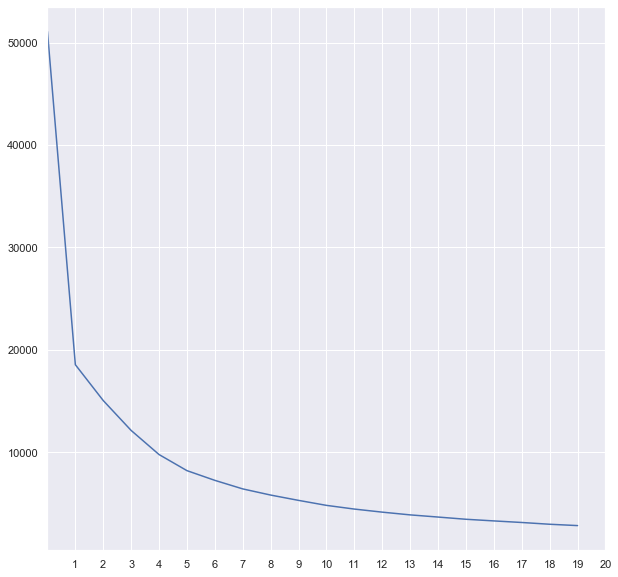

In [270]:
#Cluster_Dataset_3

resultado_df3 = [get_kmeans(num_grupos, df3) for num_grupos in range(1,21)]
resultado_df3 = pd.DataFrame(resultado_df3, columns=['groups', 'inertia'])
resultado_df3['inertia'].plot(xticks=resultado_df3['groups'])

In [271]:
print(f"optimal_number_of_clusters_df3: {optimal_number_of_clusters(calculate_wcss(scaled_df3))}")

optimal_number_of_clusters_df3: 6


In [272]:
model = KMeans(n_clusters=6)
model.fit(scaled_df3)
model.labels_

array([0, 0, 3, ..., 4, 1, 2])

In [273]:
df_model_labels = pd.DataFrame(model.labels_)
clusters_df3 = pd.concat([df3, df_model_labels], axis=1)
clusters_df3.columns = ['x','y','cluster']

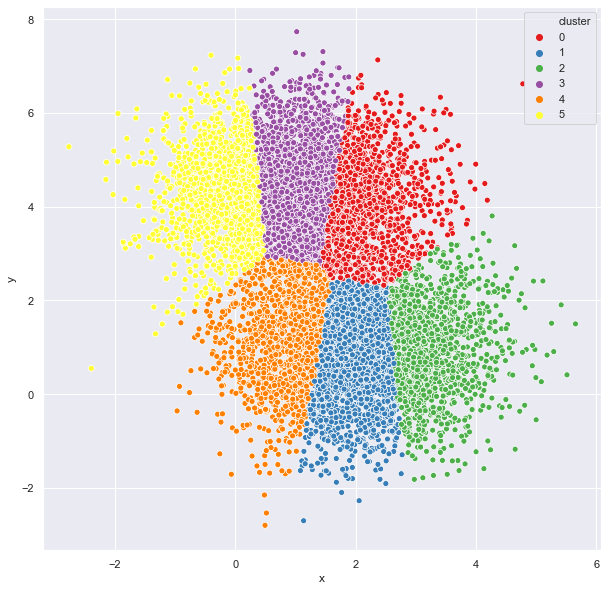

In [274]:
sns.scatterplot(x='x', y='y', hue='cluster', palette=sns.color_palette('Set1', 6), data=clusters_df3)